<a href="https://colab.research.google.com/github/MiladShahabadi/Digit-Recognition/blob/main/Digit_RecognitionT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class='alert alert-success'>
    <h1 align="center">Project: Digit Recognition</h1> 
    <h3 align="center">Multi-class logistic regression & Softmax classifier & Neural Networks </h3>
    <h5 align="center">Milad Shahabadi  
</div>

## Outline

- Multi-class logistic regression
- Softmax classifier
- Non-linear classification
- Neural Networks

In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import warnings
import gzip, pickle
import numpy as np
import matplotlib.pyplot as plt

from utils import *
from plot_utils import *

warnings.filterwarnings(action='ignore')

In [ ]:
# matplotlib configuration
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['image.interpolation'] = 'spline16'

# numpy setup
np.set_printoptions(precision=2)
np.random.seed(0)

## Load MNIST Dataset

**MNIST:** a dataset of handwritten digits, each digit is an image of size 28-by-28 pixels.

In [ ]:
DATA_PATH = 'data/mnist.pkl.gz'

with gzip.open(DATA_PATH, 'rb') as f:
    (X_train, y_train), (X_valid, y_valid), (X_test,  y_test) = pickle.load(f, encoding='latin1')

# As a sanity check, we print out the size of the data.
print('Training data shape:    ', X_train.shape)
print('Training labels shape:  ', y_train.shape)
print('Validation data shape:  ', X_valid.shape)
print('Validation labels shape:', y_valid.shape)
print('Test data shape:        ', X_test.shape)
print('Test labels shape:      ', y_test.shape)

Training data shape:     (50000, 784)
Training labels shape:   (50000,)
Validation data shape:   (10000, 784)
Validation labels shape: (10000,)
Test data shape:         (10000, 784)
Test labels shape:       (10000,)


### Visualize data

In [ ]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

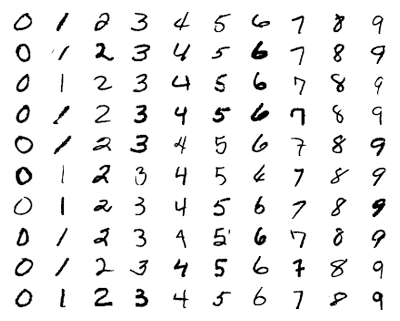

In [ ]:
plot_random_samples(X_train, y_train, classes, samples_per_class=10)

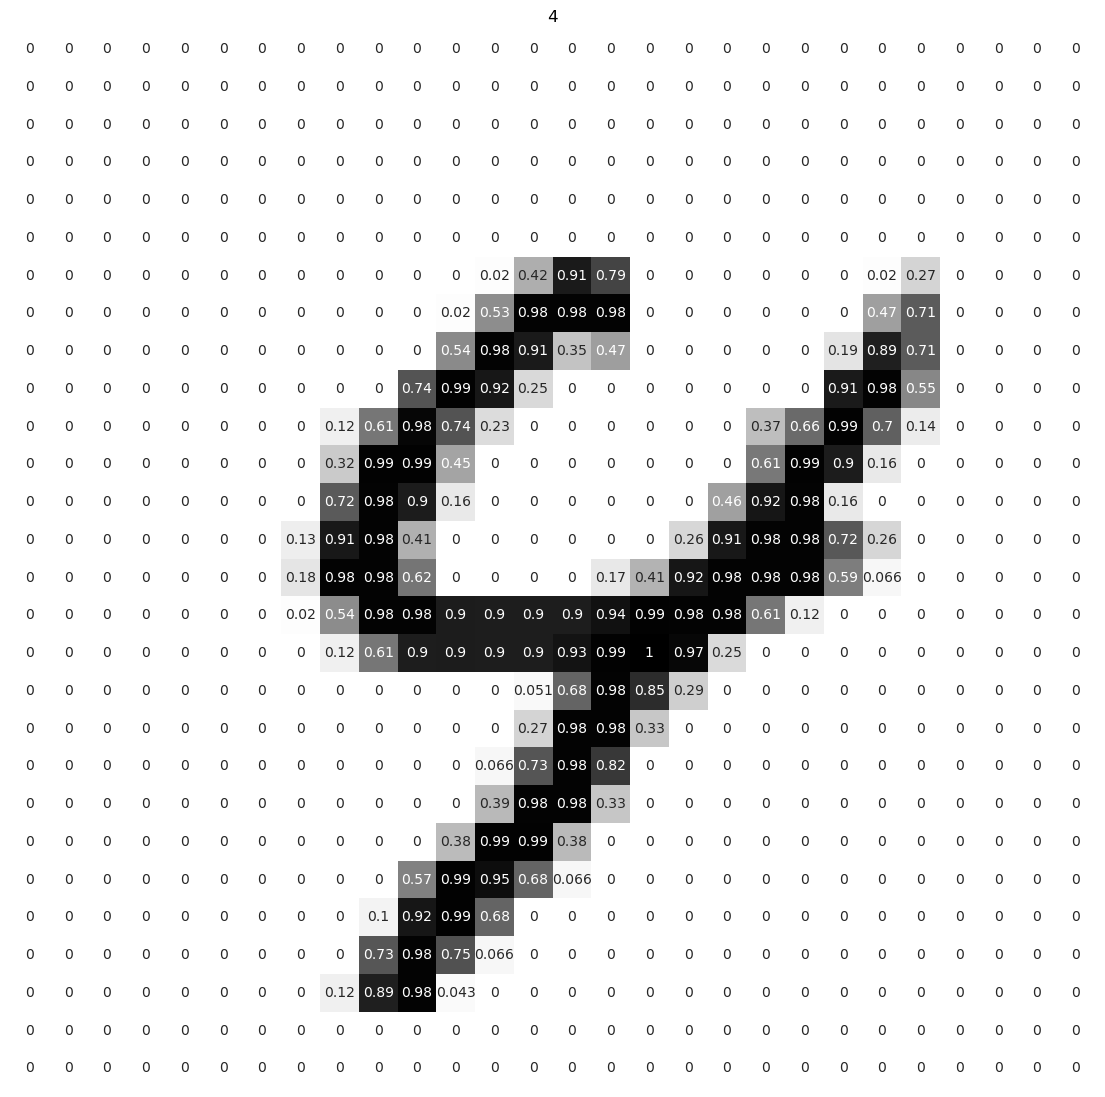

In [ ]:
plot_sample(X_train, y_train, annot=True, idx=None)

### Preprocessing: normalization

- In this dataset, every pixel has a value in `[0, 1]`, so there is no need for feature scaling.
- But still we need to subtract the mean. 

Note that the mean vector is computed only from training data and subtracted from all data.

In [ ]:
# compute mean vector from training data
mu = np.mean(X_train, axis=0)

# remove mean vector from all data
X_train -= mu
X_valid -= mu
X_test  -= mu

Plotting the mean vector

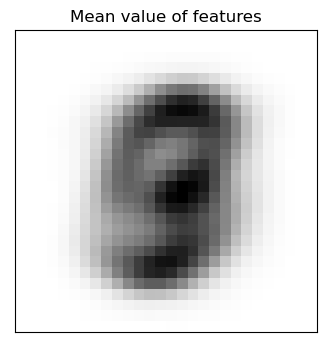

In [ ]:
plt.figure(figsize=(4, 4))
plt.imshow(mu.reshape(28, 28), interpolation='nearest', cmap=plt.cm.Greys)
plt.xticks([])
plt.yticks([])
plt.title("Mean value of features")
plt.show()

## Multi-Class Logistic Regression

#### Prediction

In [ ]:
def predict(W, b, X):
    scores = X @ W + b
    return np.argmax(scores, axis=1)

#### Prediction for random parameters

Since here we have only 10 different classes, if we predict labels using random initial weights and biases, we must get an accuracy about 10 percent ($\frac{1}{10}$). This means that the classifier is guessing the labels totally random.

In [ ]:
c = 10                # number of classes 
n = X_train.shape[1]  # number of features

# init parameters randomly
W = 0.01 * np.random.randn(n, c)
b = np.zeros(c)

# predict classes and compute accuracy
y_pred = predict(W, b, X_train)
acc = accuracy(y_pred, y_train)  # this function is defined in utils.py
print("Accuracy = {:.2f}%".format(acc))

Accuracy = 12.18%


## Softmax classifier

### Softmax function

## Training Softmax Classifier

#### Gradient

### Mini-Batch Gradient Descent

In [ ]:
def softmax_loss(W, b, X_batch, y_batch, mode='train'):
    bs = X_batch.shape[0]  # batch size
    
    scores = X_batch @ W + b
    probs = softmax(scores)
    loss = -np.sum(np.log(probs[range(bs), y_batch])) / bs
    
    if mode == 'test':
        return loss
    
    # compute gradients w.r.t scores
    dscores = np.copy(probs)
    dscores[range(bs), y_batch] -= 1.0
    dscores /= bs
    
    # compute gradients w.r.t W and b
    db = dscores.sum(axis=0)
    dW = X_batch.T @ dscores
    
    return loss, dW, db

In [ ]:
def mini_batch_gradient_descent(X_train, y_train, X_valid, y_valid, batch_size=32, 
                                alpha=0.01, lmbda=1e-4, num_epochs=100):
    
    m, n = X_train.shape
    num_batches = m % batch_size
    
    report = "Epoch {:3d}: training loss = {:.2f} | validation loss = {:.2f}"
    
    # init parameters randomly
    W = np.random.randn(n, 10) * 0.001
    b = np.zeros((10,))
    
    for epoch in range(num_epochs):
        train_loss = 0.
        
        for batch in range(num_batches):
            
            # select a random mini-batch
            idx = np.random.choice(m, batch_size, replace=False)
            X_batch, y_batch = X_train[idx], y_train[idx]
            
            # compute loss and gradient
            loss, dW, db = softmax_loss(W, b, X_batch, y_batch)  # data loss
            loss += 0.5 * lmbda * np.sum(W ** 2)                 # regularization loss
            dW += lmbda * W
            
            train_loss += loss
            
            # update parameters            
            b = b - alpha * db
            W = W - alpha * dW
        
        # report stats after each epoch
        train_loss /= num_batches        
        valid_loss = softmax_loss(W, b, X_valid, y_valid, mode='test')
        print(report.format(epoch+1, train_loss, valid_loss))
    
    return W, b

In [ ]:
# hyper-parameters
alpha = 1e-2
lmbda = 1e-4
batch_size = 64
num_epochs = 100

# run mini-batch gradient descent
W, b = mini_batch_gradient_descent(X_train, y_train, X_valid, y_valid, 
                                   batch_size=batch_size, alpha=alpha,
                                   lmbda=lmbda, num_epochs=num_epochs)

Epoch   1: training loss = 2.22 | validation loss = 2.13
Epoch   2: training loss = 2.07 | validation loss = 1.98
Epoch   3: training loss = 1.93 | validation loss = 1.85
Epoch   4: training loss = 1.80 | validation loss = 1.73
Epoch   5: training loss = 1.69 | validation loss = 1.62
Epoch   6: training loss = 1.60 | validation loss = 1.53
Epoch   7: training loss = 1.52 | validation loss = 1.45
Epoch   8: training loss = 1.45 | validation loss = 1.38
Epoch   9: training loss = 1.37 | validation loss = 1.32
Epoch  10: training loss = 1.35 | validation loss = 1.27
Epoch  11: training loss = 1.25 | validation loss = 1.21
Epoch  12: training loss = 1.24 | validation loss = 1.17
Epoch  13: training loss = 1.18 | validation loss = 1.13
Epoch  14: training loss = 1.13 | validation loss = 1.09
Epoch  15: training loss = 1.12 | validation loss = 1.06
Epoch  16: training loss = 1.09 | validation loss = 1.03
Epoch  17: training loss = 1.06 | validation loss = 1.00
Epoch  18: training loss = 1.02

In [ ]:
train_acc = accuracy(predict(W, b, X_train), y_train)
valid_acc = accuracy(predict(W, b, X_valid), y_valid)

print('Training accuracy =   {:.2f}%'.format(train_acc))
print('Validation accuracy = {:.2f}%'.format(valid_acc))

Training accuracy =   86.56%
Validation accuracy = 88.20%


#### Prediction for test data

In [ ]:
test_acc = accuracy(predict(W, b, X_test), y_test)
print('Test accuracy =   {:.2f}%'.format(train_acc))

Test accuracy =   86.56%


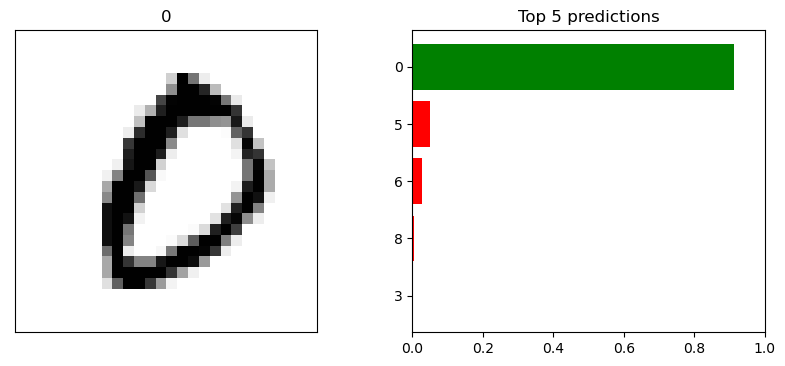

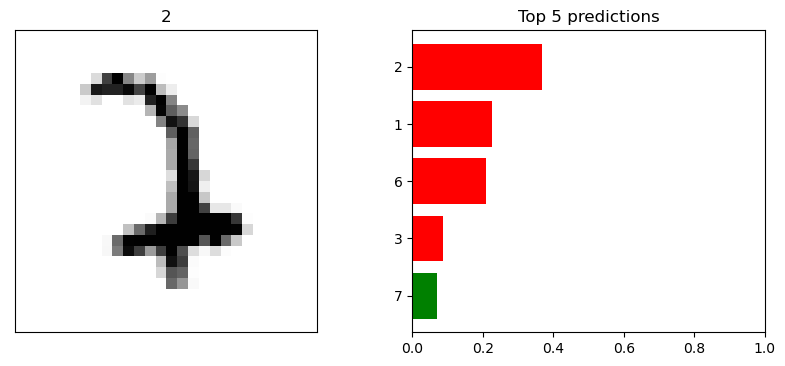

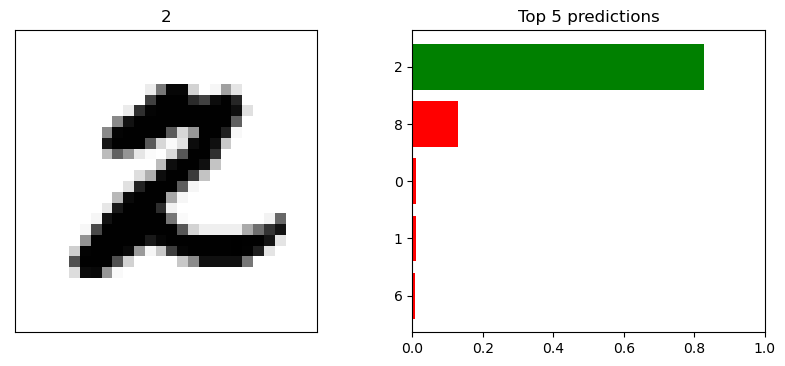

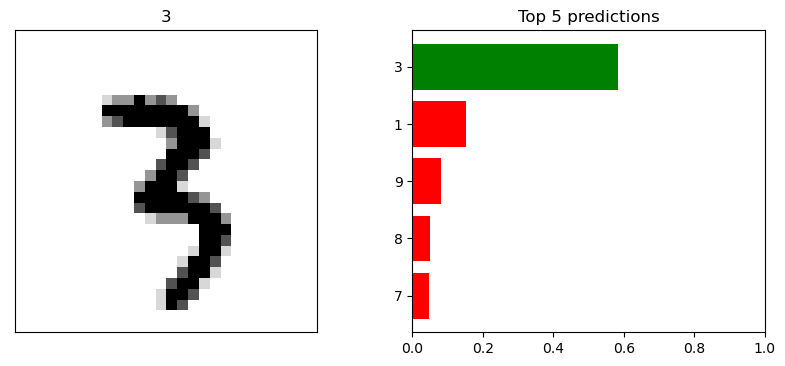

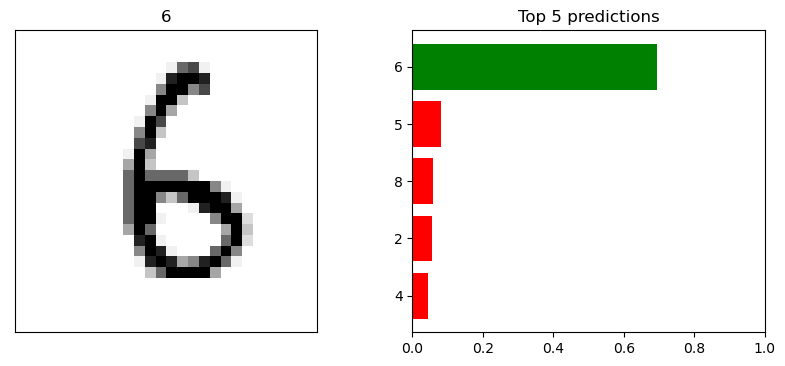

In [ ]:
for _ in range(5):
    idx = np.random.choice(X_test.shape[0])
    probs = softmax(X_test[idx].reshape((1, -1)) @ W + b)[0]
    predict_and_plot(probs, X_test[idx], y_test[idx], mu, classes)

### Visualizing weights

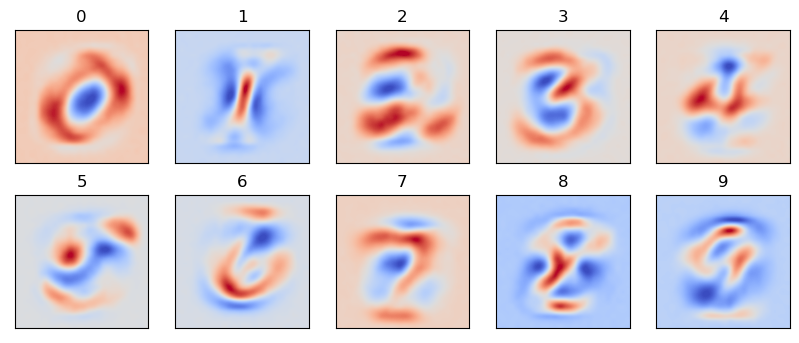

In [ ]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(W[:, i].reshape((28, 28)), cmap=plt.cm.coolwarm)
    plt.xticks([])
    plt.yticks([])
    plt.title("%d" % i)
plt.show()

### Visualizing data in 2D space

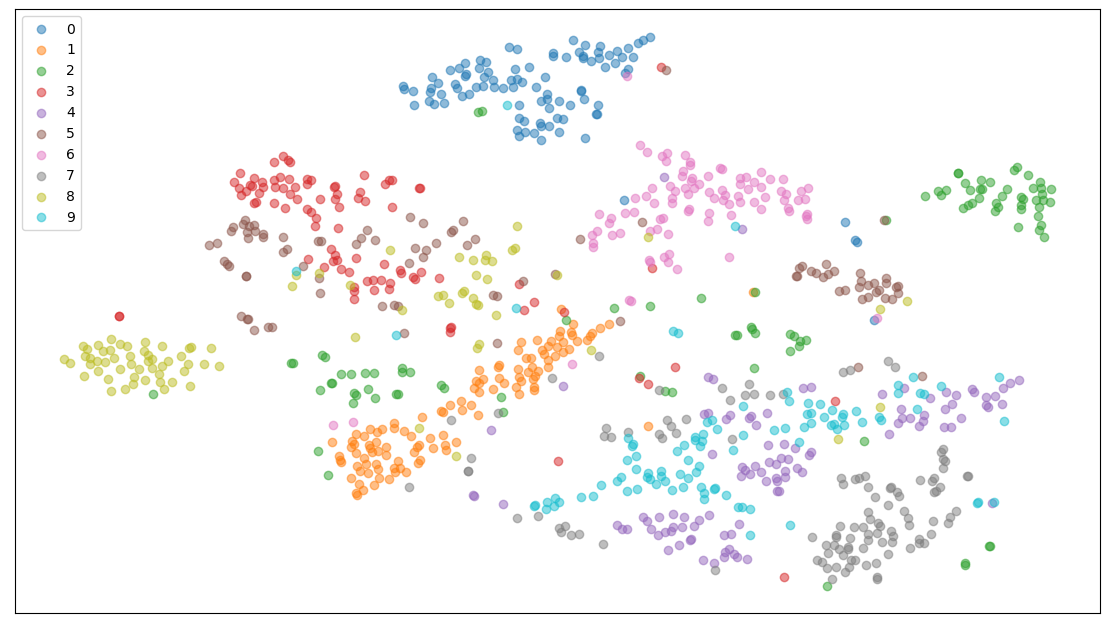

In [ ]:
plot_tsne(X_train[:1000], y_train[:1000])

## Non-linear Classification: Neural Networks

<img src='imgs/neural_nets.png' width='90%'>

In [ ]:
from utils import softmax_loss


class TwoLayerNeuralNetwork:
    
    def __init__(self, num_features=784, num_hiddens=20, num_classes=10):
        self.num_hiddens = num_hiddens
        self.num_classes = num_classes
        
        # random initialization: create random weights, set all biases to zero
        self.params = {}
        self.params['W1'] = np.random.randn(num_features, num_hiddens) * 0.001
        self.params['W2'] = np.random.randn(num_hiddens,  num_classes) * 0.001
        self.params['b1'] = np.zeros((num_hiddens,))
        self.params['b2'] = np.zeros((num_classes,))
        
    def forward(self, X):
        # forward step
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        
        # forward step
        h_in = X @ W1 + b1       # hidden layer input
        h = np.maximum(0, h_in)  # hidden layer output (using ReLU)
        scores = h @ W2 + b2     # neural net output
        
        return scores
                            
    def train_step(self, X, y):
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        
        # forward step
        h_in = X @ W1 + b1       # hidden layer input
        h = np.maximum(0, h_in)  # hidden layer output (using ReLU)
        scores = h @ W2 + b2     # neural net output
        
        # compute loss
        loss, dscores = softmax_loss(scores, y)
        
        # backward step
        db2 = dscores.sum(axis=0)
        dW2 = h.T @ dscores
        
        dh = dscores @ W2.T
        dh[h_in < 0] = 0.0
        db1 = dh.sum(axis=0)
        dW1 = X.T @ dh
        
        gradient = {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2}
                
        return loss, gradient
        
    def train(self, X_train, y_train, X_valid, y_valid, batch_size=50, 
              alpha=0.001, lmbda=0.0001, num_epochs=10):
        
        m, n = X_train.shape        
        num_batches = m // batch_size
        
        report = "{:3d}: training loss = {:.2f} | validation loss = {:.2f}"
        
        losses = []
        for epoch in range(num_epochs):
            train_loss = 0.0
            
            for _ in range(num_batches):
                W1, b1 = self.params['W1'], self.params['b1']
                W2, b2 = self.params['W2'], self.params['b2']
                
                # select a random mini-batch
                batch_idx = np.random.choice(m, batch_size, replace=False)
                X_batch, y_batch = X_train[batch_idx], y_train[batch_idx]

                # train on mini-batch
                data_loss, gradient = self.train_step(X_batch, y_batch)
                reg_loss = 0.5 * (np.sum(W1 ** 2) + np.sum(W2 ** 2))
                train_loss += (data_loss + lmbda * reg_loss)
                losses.append(data_loss + lmbda * reg_loss)

                # regularization
                gradient['W1'] += lmbda * W1
                gradient['W2'] += lmbda * W2

                # update parameters
                for p in self.params:
                    self.params[p] = self.params[p] - alpha * gradient[p]
            
            # report training loss and validation loss
            train_loss /= num_batches
            valid_loss = softmax_loss(self.forward(X_valid), y_valid, mode='test')
            print(report.format(epoch + 1, train_loss, valid_loss))
        
        return losses
    
    def predict(self, X):
        """ Predict labels for input data.
        """
        scores = self.forward(X)
        return np.argmax(scores, axis=1)
    
    def predict_proba(self, X):
        """ Predict probabilties of classes for each input data.
        """
        scores = self.forward(X)
        return softmax(scores)

In [ ]:
mlp = TwoLayerNeuralNetwork(num_hiddens=20)
losses = mlp.train(X_train, y_train, X_valid, y_valid, 
                   alpha=0.05, lmbda=0.001, num_epochs=10)

  1: training loss = 1.30 | validation loss = 0.42
  2: training loss = 0.38 | validation loss = 0.28
  3: training loss = 0.32 | validation loss = 0.24
  4: training loss = 0.28 | validation loss = 0.22
  5: training loss = 0.26 | validation loss = 0.21
  6: training loss = 0.26 | validation loss = 0.20
  7: training loss = 0.24 | validation loss = 0.19
  8: training loss = 0.24 | validation loss = 0.18
  9: training loss = 0.23 | validation loss = 0.17
 10: training loss = 0.23 | validation loss = 0.16


In [ ]:
train_acc = accuracy(mlp.predict(X_train), y_train)
print("Training accuracy   = {:.2f}%".format(train_acc))

test_acc = accuracy(mlp.predict(X_test), y_test)
print("Validation accuracy = {:.2f}%".format(test_acc))

Training accuracy   = 95.34%
Validation accuracy = 94.96%


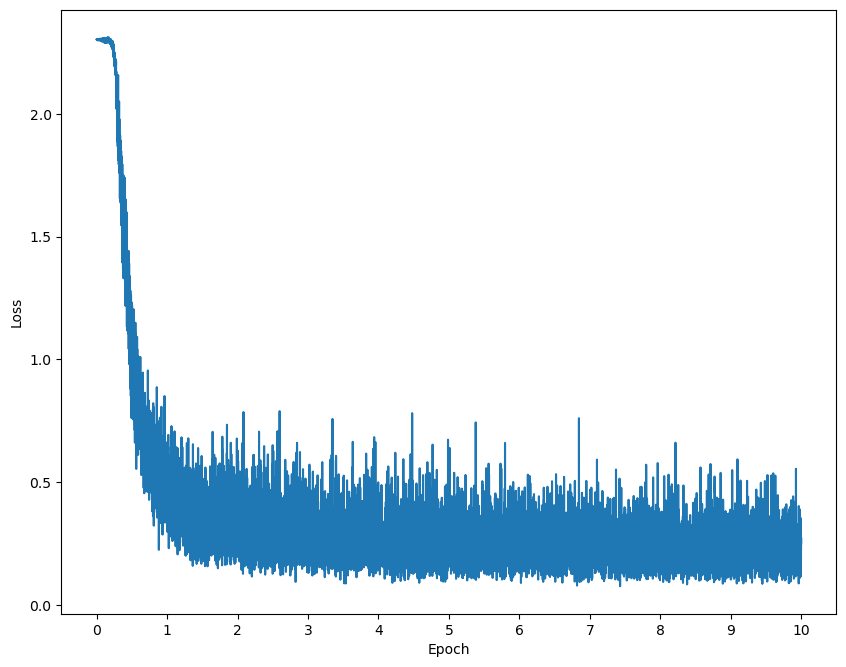

In [ ]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, 10001, 1000), range(0, 11))
plt.show()

### Prediction for test data

In [ ]:
test_acc = accuracy(predict(W, b, X_test), y_test)
print('Test accuracy = {:.2f}%'.format(train_acc))

Test accuracy = 95.34%


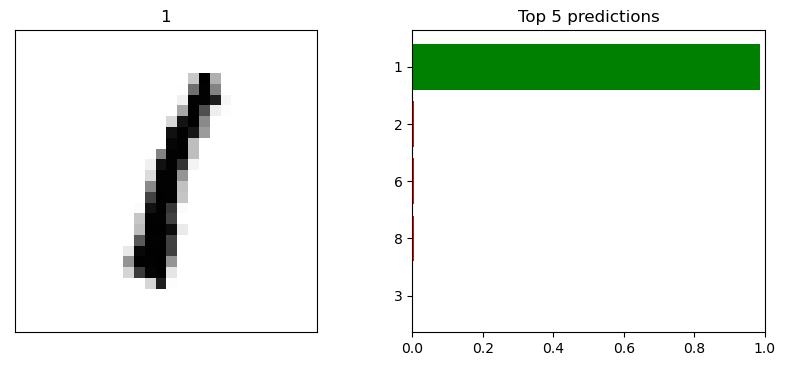

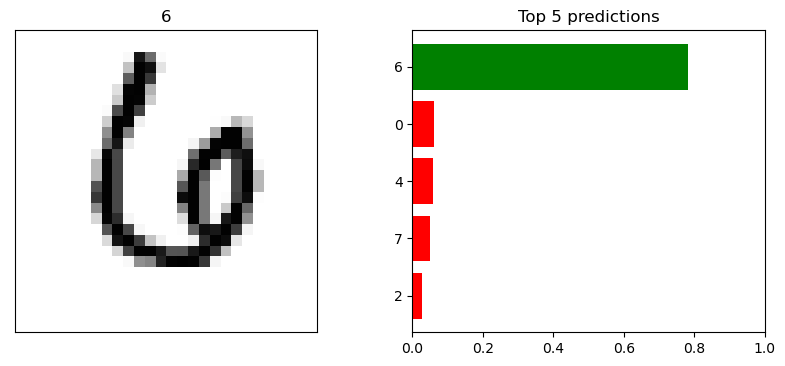

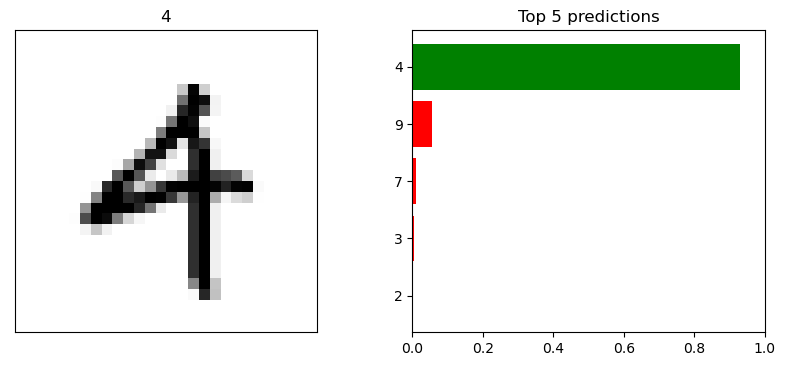

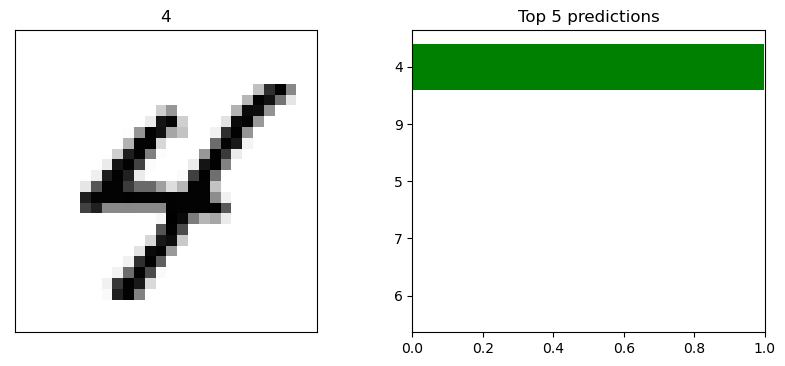

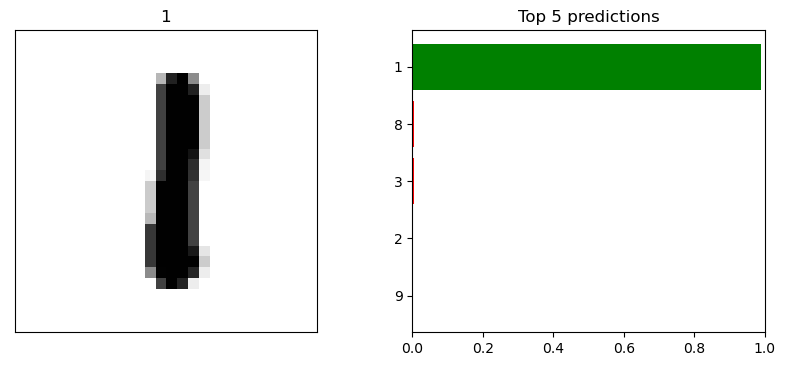

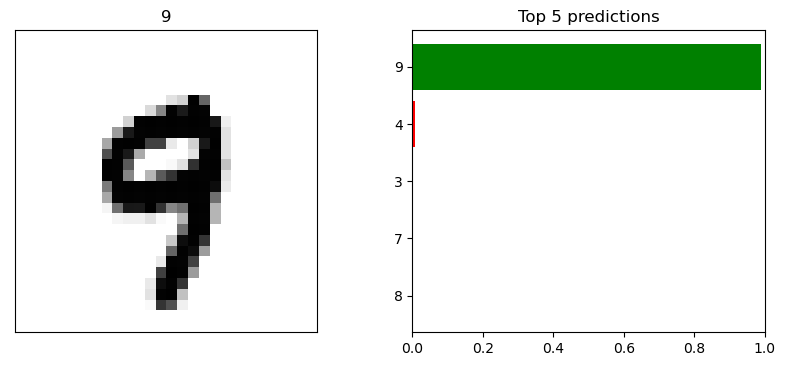

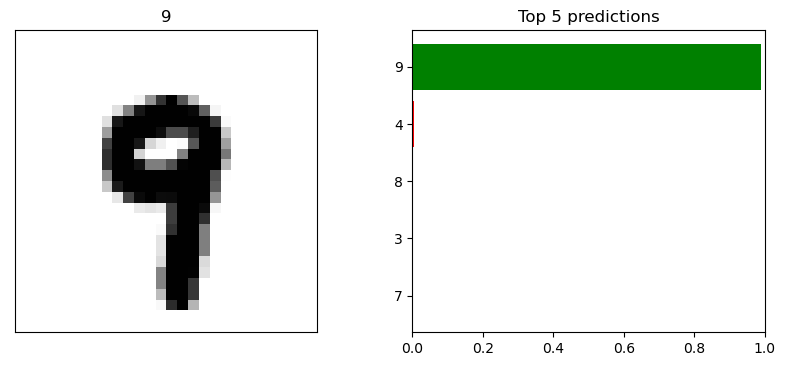

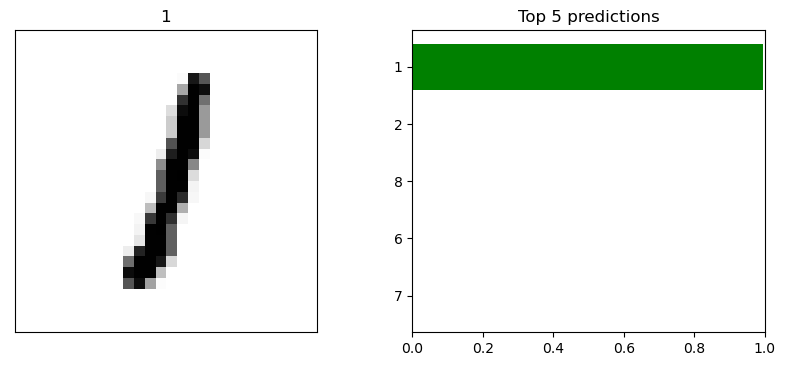

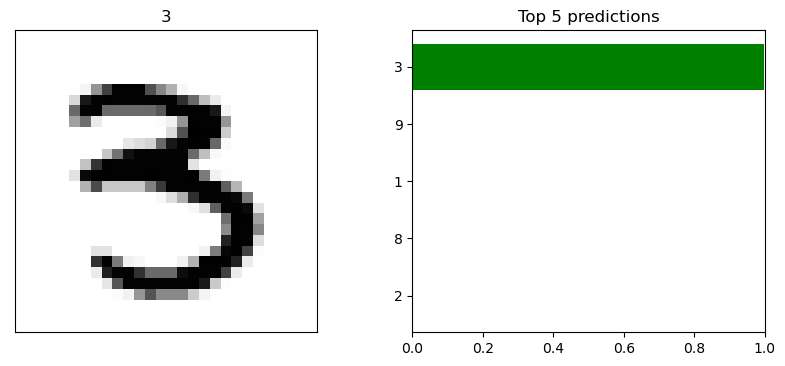

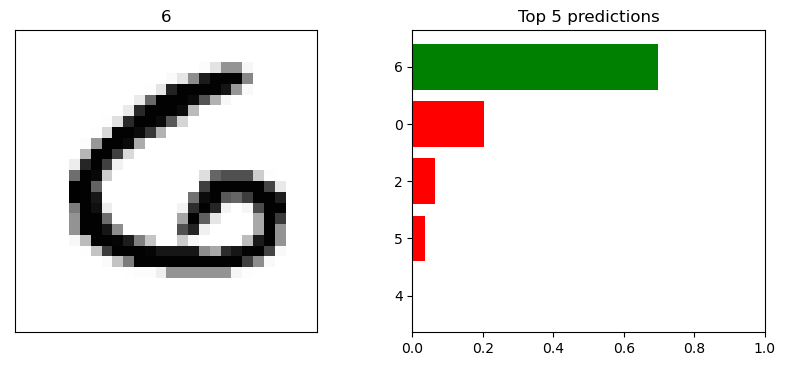

In [ ]:
for i in range(10):
    idx = np.random.choice(len(y_test))
    probs = mlp.predict_proba(X_test[idx].reshape((1, -1)))[0]
    predict_and_plot(probs, X_test[idx], y_test[idx], mu, classes)

### Plot misclassified data

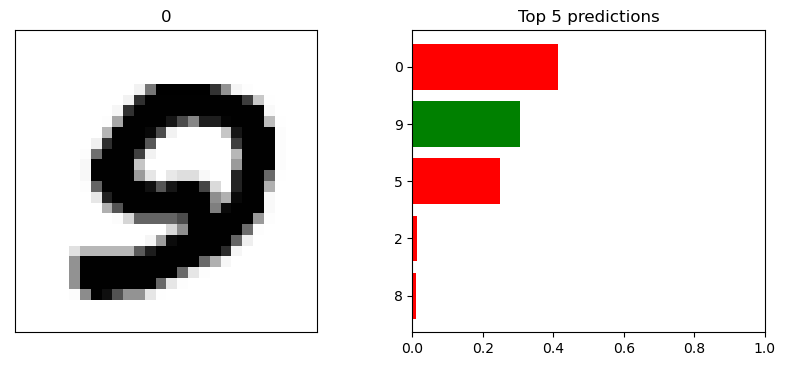

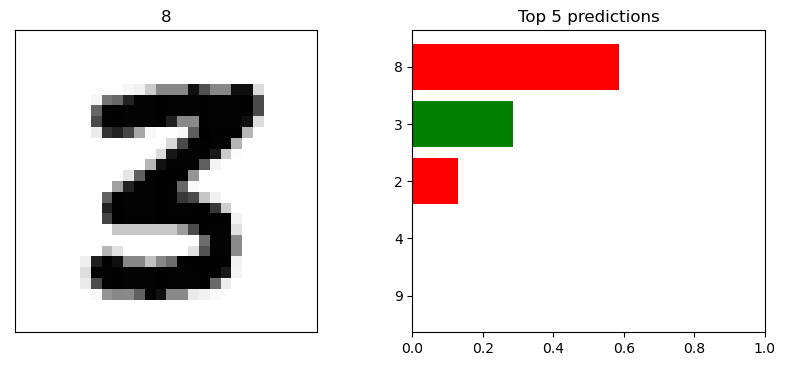

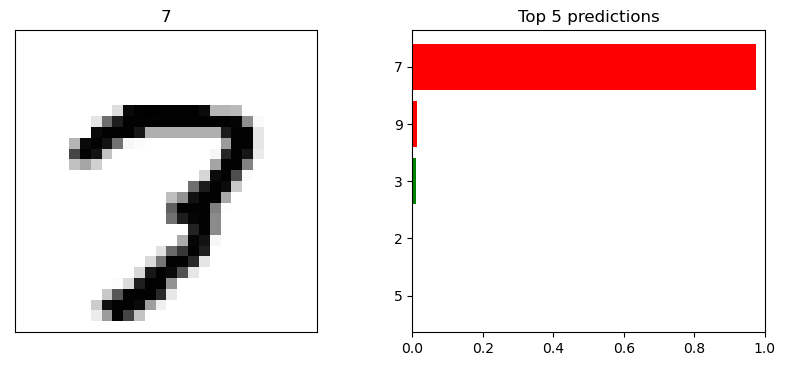

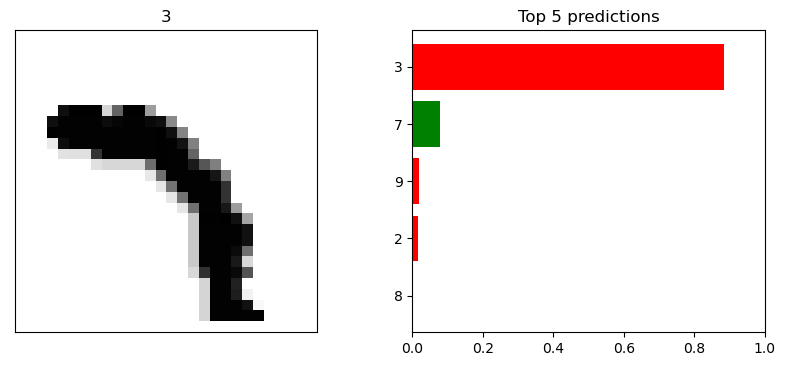

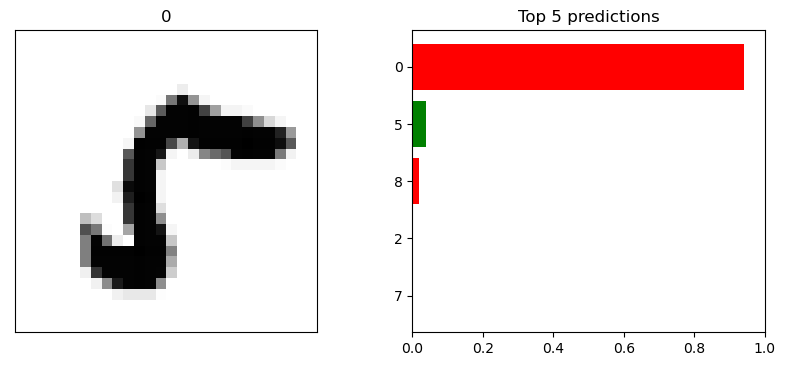

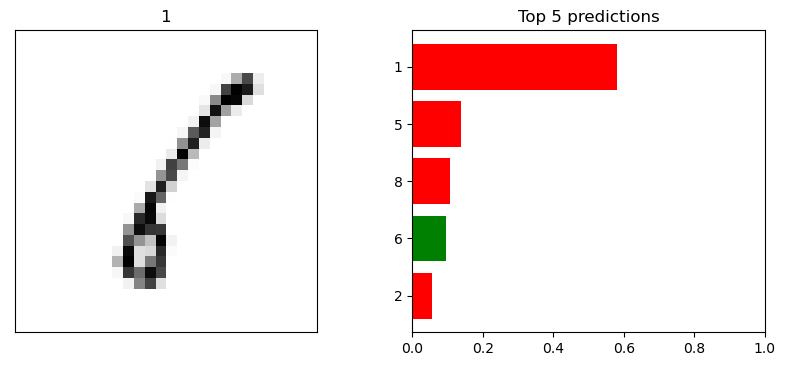

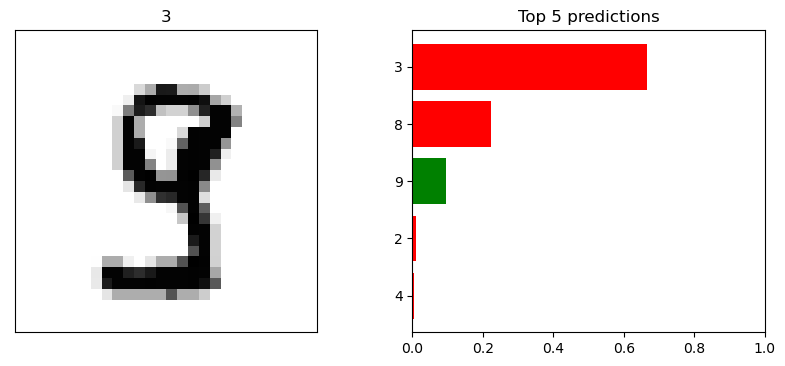

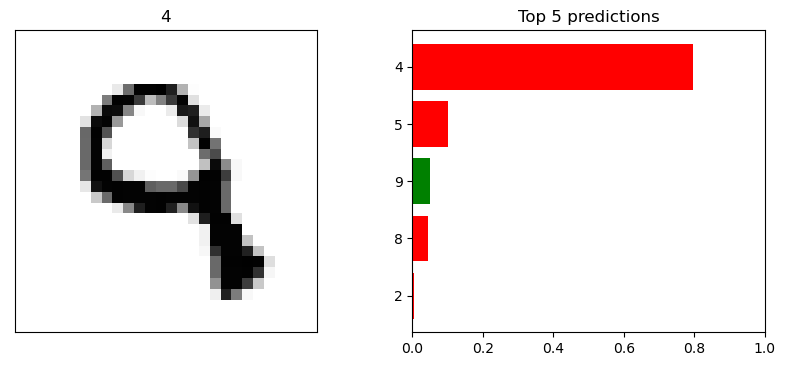

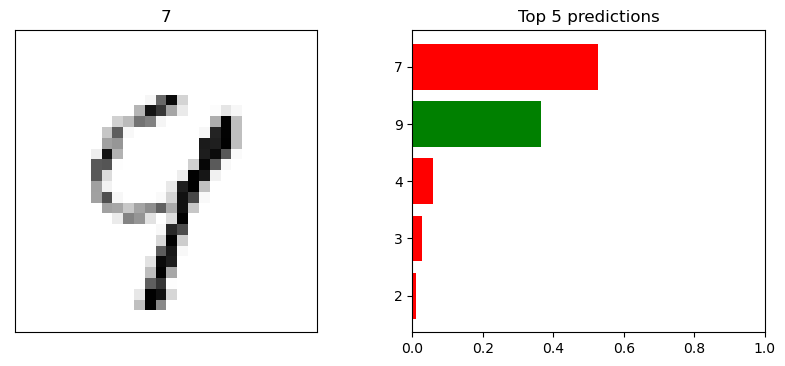

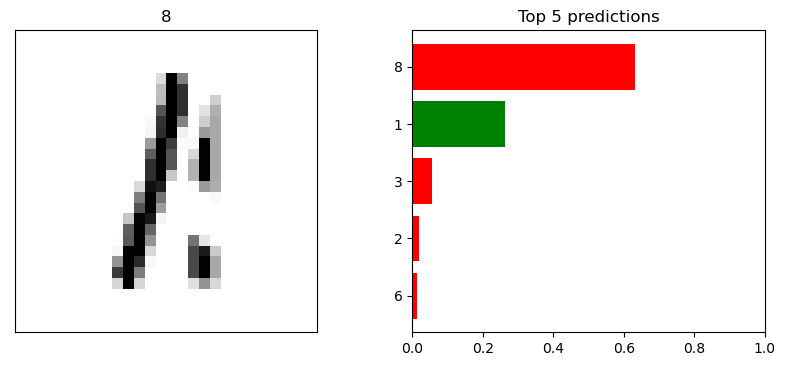

In [ ]:
count = 10
y_pred = mlp.predict(X_test)
idx = np.flatnonzero(y_pred != y_test)
sample_idx = np.random.choice(idx, count)

for i in sample_idx:
    probs = mlp.predict_proba(X_test[i].reshape((1, -1)))[0]
    predict_and_plot(probs, X_test[i], y_test[i], mu, classes)

### Confusion matrix

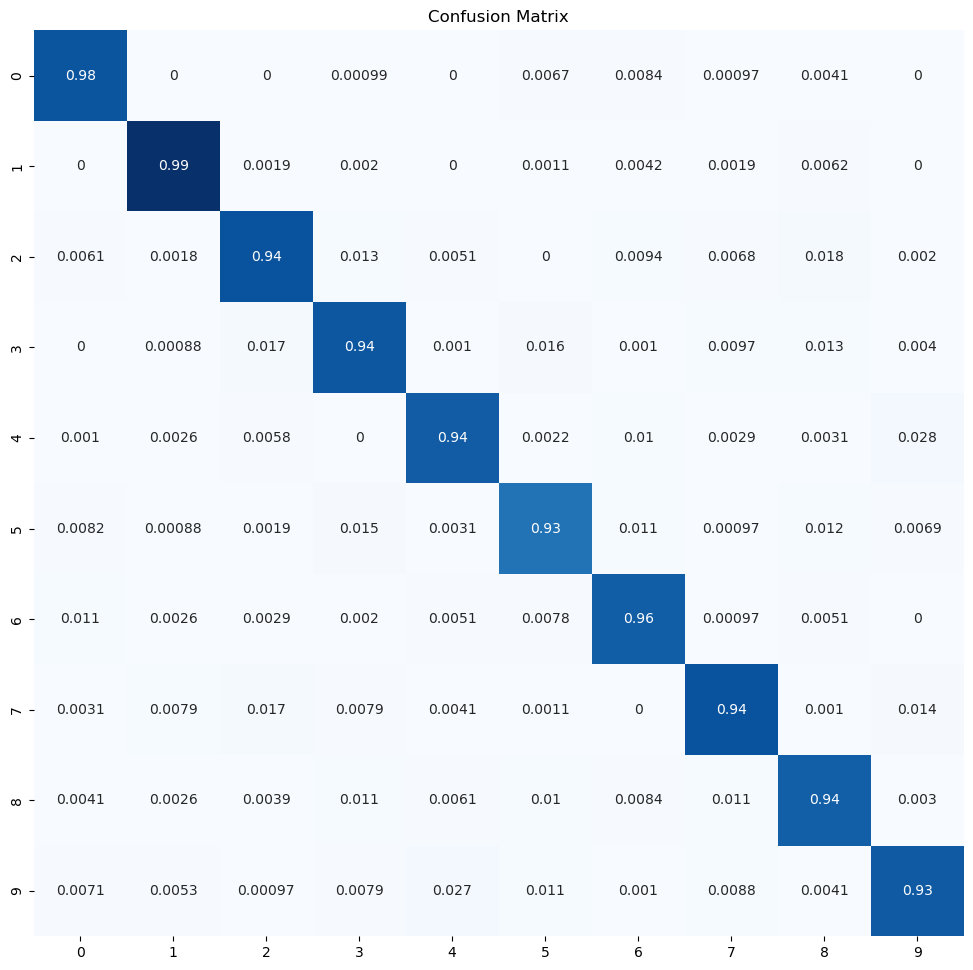

In [ ]:
y_pred = mlp.predict(X_test)
plot_confusion_matrix(y_test, y_pred, normalize=True)

### Visualizing features

In [ ]:
W = mlp.params['W1']
print(W.shape)

(784, 20)


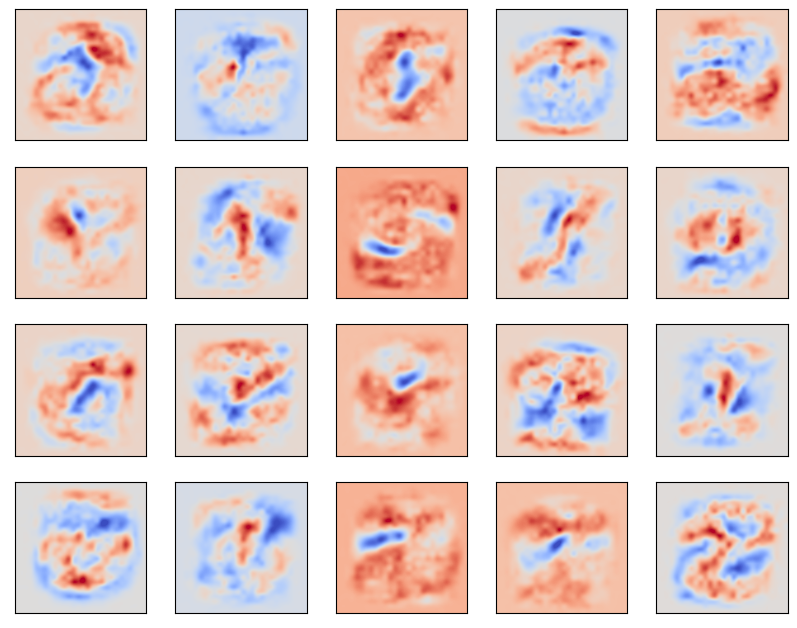

In [ ]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(W[:, i].reshape((28, 28)), cmap=plt.cm.coolwarm)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Training Using Advanced Optimization Methods

In [ ]:
from scipy.optimize import minimize

In [ ]:
def neural_net_loss(W, X, y, lmbda=0.001, F=784, H=20, C=10, mode='train'):
    
    # extract W1, b1, W2, b2 from W
    W1 = np.reshape(W[: F * H], (F, H))
    b1 = W[F * H: (F + 1) * H]
    
    W2 = np.reshape(W[(F + 1) * H: (F + 1) * H + H * C], (H, C))
    b2 = W[(F + 1) * H + H * C:]
    
    # Forward step
    h_in = X @ W1 + b1
    h = np.maximum(0, h_in)
    scores = h @ W2 + b2
        
    # compute loss
    if mode != 'train':
        return softmax_loss(scores, y, mode=mode)
    
    loss, dscores = softmax_loss(scores, y)
    loss += 0.5 * lmbda * (np.sum(W1 ** 2) + np.sum(W2 ** 2))
    
    # Backward Step
    db2 = dscores.sum(axis=0)
    dW2 = h.T @ dscores
    dh = dscores @ W2.T
    
    dh[h_in < 0] = 0.0
    db1 = dh.sum(axis=0)
    dW1 = X.T @ dh
    
    dW1 += lmbda * W1
    dW2 += lmbda * W2
    
    # concatenate all grads in a column vector
    dW = np.concatenate((dW1.ravel(), db1, dW2.ravel(), db2), axis=0)
    
    return loss, dW

In [ ]:
def report_callback(W):
    loss = neural_net_loss(W, X_valid, y_valid, mode='test')
    print("Validation loss = {:.2f}".format(loss))

In [ ]:
def predict_nn(W1, b1, W2, b2, X):
    h = np.maximum(0, X @ W1 + b1)
    scores = h @ W2 + b2
    return np.argmax(scores, axis=1)

In [ ]:
F = 784  # num. features
H = 20   # num. hidden neurons
C = 10   # num. classes

# create and init parameters W1, W2
W1 = np.random.randn(F, H) * 0.001
W2 = np.random.randn(H, C) * 0.001

b1 = np.zeros((H,))
b2 = np.zeros((C,))

# concat all parameters in one column vector
W = np.concatenate((W1.ravel(), b1, W2.ravel(), b2), axis=0)

In [ ]:
result = minimize(
    neural_net_loss, 
    x0=W, 
    args=(X_train, y_train), 
    method='CG', 
    jac=True,
    options={'maxiter': 50},
    callback=report_callback
)

Validation loss = 2.30
Validation loss = 1.78
Validation loss = 1.78
Validation loss = 1.39
Validation loss = 1.07
Validation loss = 0.85
Validation loss = 0.71
Validation loss = 0.60
Validation loss = 0.52
Validation loss = 0.45
Validation loss = 0.37
Validation loss = 0.34
Validation loss = 0.32
Validation loss = 0.30
Validation loss = 0.28
Validation loss = 0.27
Validation loss = 0.26
Validation loss = 0.25
Validation loss = 0.24
Validation loss = 0.23
Validation loss = 0.23
Validation loss = 0.22
Validation loss = 0.21
Validation loss = 0.20
Validation loss = 0.19
Validation loss = 0.19
Validation loss = 0.18
Validation loss = 0.18
Validation loss = 0.18
Validation loss = 0.17
Validation loss = 0.17
Validation loss = 0.17
Validation loss = 0.16
Validation loss = 0.16
Validation loss = 0.16
Validation loss = 0.16
Validation loss = 0.16
Validation loss = 0.15
Validation loss = 0.15
Validation loss = 0.15
Validation loss = 0.15
Validation loss = 0.15
Validation loss = 0.15
Validation 

In [ ]:
result

     fun: 0.20484126290985666
     jac: array([ 1.65e-08, -4.13e-08, -5.61e-08, ..., -3.04e-04, -6.36e-04,
       -1.16e-05])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 117
     nit: 50
    njev: 109
  status: 1
 success: False
       x: array([ 1.65e-05, -4.13e-05, -5.61e-05, ..., -4.04e-01,  1.29e+00,
        1.96e-01])

In [ ]:
W = result.x

# extract W1, b1, W2, b2 from W
W1 = np.reshape(W[: F * H], (F, H))
b1 = W[F * H: (F + 1) * H]

W2 = np.reshape(W[(F + 1) * H: (F + 1) * H + H * C], (H, C))
b2 = W[(F + 1) * H + H * C:]

In [ ]:
acc = accuracy(predict_nn(W1, b1, W2, b2, X_test), y_test)
print("Test accuracy = {:.2f}".format(acc))

Test accuracy = 95.45


### Neural networks in scikit learn

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(20,), learning_rate='adaptive', alpha=1.0, max_iter=50, verbose=1)
model.fit(X_train, y_train);

Iteration 1, loss = 0.94137701
Iteration 2, loss = 0.51294240
Iteration 3, loss = 0.46339159
Iteration 4, loss = 0.44027585
Iteration 5, loss = 0.42636575
Iteration 6, loss = 0.41687644
Iteration 7, loss = 0.41074785
Iteration 8, loss = 0.40547076
Iteration 9, loss = 0.40172594
Iteration 10, loss = 0.39831747
Iteration 11, loss = 0.39583524
Iteration 12, loss = 0.39358264
Iteration 13, loss = 0.39117697
Iteration 14, loss = 0.38970723
Iteration 15, loss = 0.38808643
Iteration 16, loss = 0.38710796
Iteration 17, loss = 0.38628734
Iteration 18, loss = 0.38569505
Iteration 19, loss = 0.38456511
Iteration 20, loss = 0.38380636
Iteration 21, loss = 0.38358702
Iteration 22, loss = 0.38260182
Iteration 23, loss = 0.38201619
Iteration 24, loss = 0.38169146
Iteration 25, loss = 0.38118498
Iteration 26, loss = 0.38069176
Iteration 27, loss = 0.38010707
Iteration 28, loss = 0.37973129
Iteration 29, loss = 0.37939948
Iteration 30, loss = 0.37906736
Iteration 31, loss = 0.37866236
Iteration 32, los

In [ ]:
train_acc = model.score(X_train, y_train)
print("Train accuracy = {:.2f}%".format(train_acc * 100))

test_acc = model.score(X_test, y_test)
print("Test accuracy  = {:.2f}%".format(test_acc * 100))

Train accuracy = 95.02%
Test accuracy  = 95.15%
